# Исследование объявлений о продаже квартир

Имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. <br>
Необходимо определить параметры, влияющие на стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<b>Описание данных</b>

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия) 
first_day_exposition — дата публикации \
floor — этаж \
floors_total — всего этажей в доме \
is_apartment — апартаменты (булев тип) \
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах(м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении\
<br>
--------------------------------------------------------------------------------------
<br>
<b>Содержание</b>

[Шаг 1. Откроем файл с данными и изучим общую информацию](#a)\
[Шаг 2. Предобработка данных](#b)\
[Шаг 3. Посчитаем и добавим в таблицу](#c)\
[Шаг 4. Проведем исследовательский анализ данных и выполним инструкции](#d)\
[Шаг 5. Общий вывод](#e)

<a id='a'></a>

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'C:\Users\bosss\Desktop\Датасеты Практикум\02.csv', sep = '\t')
display(data.info())
display(data.head())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

<b>С первого взгляда замечаем ошибки в данных:</b>
    
- чересчур высокие(100м) потолки   
- заметны строки с пропущенными значениями, которые должны были быть получены автоматически на основе картографических данных 
- отсутствующие значения в столбцах
    
<br>


<b>Ошибки в типах данных:</b>\
Не datatime типа:
- дата публикации "first_day_exposition"

Не булева типа:
- апартаменты "is_apartment"

Вещественные, в то время как должны быть строго целочисленные:
- количество этажей в доме "floors_total"
- число балконов "balcony"
- число парков "parks_around3000"
- число водоемов "ponds_around3000"
- количество дней от публикации до снятия "days_exposition"

<a id='b'></a>

### Шаг 2. Предобработка данных

Комментарии:

<b>"first_day_exposition":</b> поменяем тип данных на datetime    
    
<br>
    
<b>"is_apartment":</b> логично предположить, что человек, продающий апартаменты - обязательно указал бы их причастность к этому типу, так как апартаменты - это нежилая недвижимость и продается на других условиях. В связи с этим заменим пропущенные значения на 'False'.
    
<br>
     
<b>"balcony":</b> предположительно, не указанное количество балконов, говорит об их отсутствии. Заменим пропуски на 0 и поменяем тип данных на целочисленные (так как количество - строгая величина).
    
<br>
    
<b>Пропуски в столбцах: floors_total, days_exposition  </b>- оставим как есть. Искажать данные не будем, ввиду отсутствия коррелирующих факторов.
    
<br>
    
<b>Пропуски в столбцах: airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest </b> - данные, которые должны были быть получены автоматически на основе картографических данных. У нас их нет, в связи с этим оставим значения пустыми. 
    
<br>
    
<b>"locality_name":</b> присвоим пустым ячейкам значение "Санкт-Петербург", если расстояние до центра города менее 20км (из логических соображений, что средний диаметр города около 40км)
     
<br>
    
<b>"ceiling_height":</b> сгруппируем по названию населенного пункта и вставим медианные значения в ячейки с пропущенными и сверхбольшими значениями (в сталинках высота потолков достигает 4 метров, возьмем эту величину, как ограничение по высоте)
        
<br>
    
<b>"living_area":</b> для точности сгруппируем по 3ем параметрам (населенный пункт, количество комнат и общая площадь), найдем медианные значения и заполним пропуски 
        
<br>
    
<b>"kitchen_area":</b> проведем ту же операцию с пропусками в столбце кухонь, только вместо количества комнат, как параметр, поставим уже найденную жилую площадь

In [2]:
# Для начала узнаем количество пропущенных значений по столбцам
display(data.isna().sum())
###############################################################


# ПЕРЕВЕДЕМ ЗНАЧЕНИЯ СТОЛБЦА 'first_day_exposition' В ПРИСУЩИЙ ЕМУ ТИП ДАННЫХ
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


# ЗАПОЛНИМ ПРОПУСКИ СТОЛБЦА 'is_apartment' ЗНАЧЕНИЕМ FALSE
data['is_apartment'] = data['is_apartment'].fillna(value = False)


# ЗАМЕНИМ ПРОПУСКИ В СТОЛБЦЕ С КОЛИЧЕСТВОМ БАЛКОНОВ НА НУЛЕВЫЕ ЗНАЧЕНИЯ И ПЕРЕВЕДЕМ В ЦЕЛОЧИСЛЕННЫЙ ТИП ДАННЫХ
data['balcony'] = data['balcony'].fillna(value = 0).astype('int')


# ПРИСВОИМ ОТСУТСВУЮЩИМ НАСЕЛЕННЫМ ПУНКТАМ ЗНАЧЕНИЕ 'Санкт-Петербург', ЕСЛИ ДО ЦЕНТРА ГОРОДА МЕНЕЕ 20 КМ
def spb_name(row):
    if pd.isna(row['locality_name']) and row['cityCenters_nearest'] <= 20000:
        return 'Санкт-Петербург'
    return row['locality_name']
 
data['locality_name'] = data.apply(spb_name, axis=1)


# ПРОВЕДЕМ КАЧЕСТВЕННУЮ ГРУППИРОВКУ ДЛЯ ПОИСКА ЗНАЧЕНИЙ ЖИЛОЙ ПЛОЩАДИ
living_lrt = data.groupby(["locality_name", "rooms", "total_area"])['living_area'].median().to_dict() 
def median_living_area(row):
    if np.isnan(row['living_area']):
        return living_lrt.get((row['locality_name'], row['rooms'], row['total_area']))
    return row['living_area'] 
data["living_area"] = data.apply(median_living_area, axis=1)


# ПРОВЕДЕМ КАЧЕСТВЕННУЮ ГРУППИРОВКУ ДЛЯ ПОИСКА ЗНАЧЕНИЙ КУХОННОЙ ПЛОЩАДИ
kitchen_llt = data.groupby(["locality_name", "living_area", "total_area"])['kitchen_area'].median().to_dict() 
def median_kitchen_area(row):
    if np.isnan(row['kitchen_area']):
        return kitchen_llt.get((row['locality_name'], row['living_area'], row['total_area']))
    return row['kitchen_area'] 
data["kitchen_area"] = data.apply(median_kitchen_area, axis=1)


# ПРОБЛЕМА ВЫСОКИХ ПОТОЛКОВ
# Проведем группировку по местоположению и измерим медианную высоту
group_ceiling_height = data.groupby('locality_name')['ceiling_height'].median()
# заполним пропуски и сверхбольшие значения (>4м)
for i in group_ceiling_height.index:
    data.loc[(data['locality_name'] == i) & ((data['ceiling_height'].isna()) | (data['ceiling_height'] > 4)), 'ceiling_height'] = group_ceiling_height[i]
print()


# УДАЛИМ ДУБЛИКАТЫ, если они есть
data = data.drop_duplicates().reset_index(drop = True)


data.info()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23569 non-null float64
floors_total            23613 non-null float64
living_area             23003 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            22332 non-null float64
balcony                 23699 non-null int32
locality_name           23687 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            130
floors_total               86
living_area               696
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1367
balcony                     0
locality_name              12
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Как итог, мы:\
-почистили таблицу от сверхбольших значений, \
-привели определенные столбцы к нужным типам данных, \
-заменили пропуски значениями на основании логических выводов. 

<a id='c'></a>

### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
# Добавим цену за м2
data['price_per_meter'] = data['last_price'] / data['total_area']


# Добавим отдельно день недели, месяц и год публикации объявления
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year


# Добавим этажи квартиры (для этого проведем категоризацию)
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1 or floor == 0:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_group'] = data.apply(floor_group, axis=1)


# Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_total'] = data['living_area'] / data['total_area']
data['kitchen_total'] = data['kitchen_area'] / data['total_area']

# data.head()

### Вывод
Ввели дополнительные параметры на основании уже имеющихся, путем категоризации данных и отношений между столбцами.\
В отображаемой таблице в столбце "day":\
0 - Понедельник;\
1 - Вторник;\
.\
.\
6 - Воскресенье.

<a id='d'></a>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

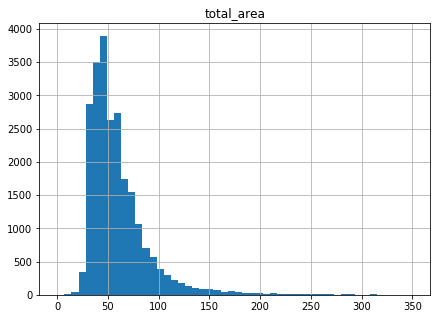

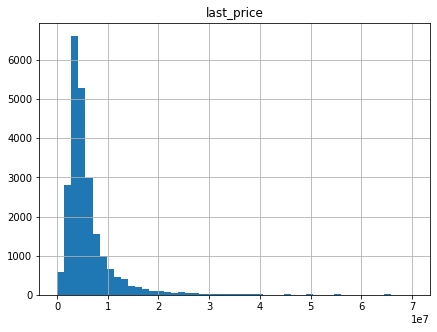

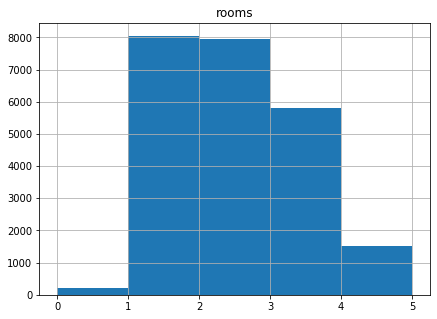

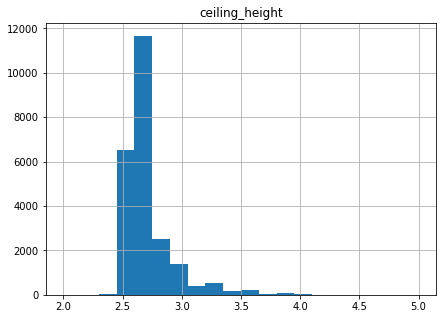

In [4]:
#ИЗУЧИМ СЛЕДУЮЩИЕ ПАРАМЕТРЫ: площадь, цена, число комнат, высота потолков

import matplotlib.pyplot as plt

# Напишем функцию для вывода гистограмм

def hist_columns(data, column, bins, x1, x2, f1, f2):
    h = data[column].hist(bins = bins, range = (x1, x2), figsize = (f1, f2))
    h.set_title(column)
    return plt.show()

hist_columns(data, 'total_area', 50, 0, 350, 7, 5)
hist_columns(data, 'last_price', 50, 12000, 70000000, 7, 5)
hist_columns(data, 'rooms', 5, 0, 5, 7, 5)
hist_columns(data, 'ceiling_height', 20, 2, 5, 7, 5)

По гистограммам видим, что:
 - превалирующее значение площади квартир составляет чуть менее 50 кв.м., при этом можем наблюдать второй пик около 60кв.м. Есть выбивающиеся значения от 200 до 300 кв.м.
 - наиболее встречающаяся цена за квартиру составляет около 3,5 млн рублей, также видим аномальные значения стоимости около 7млн руб.
 - самые распространенные квартиры - это двушки и треши. Однокомнатные квартиры продаются в десятки раз реже.
 - наиболее частая высота потолков 2.65 м, но не забываем про сталинки с потолками в 4 м.
 
При bins = 'auto':

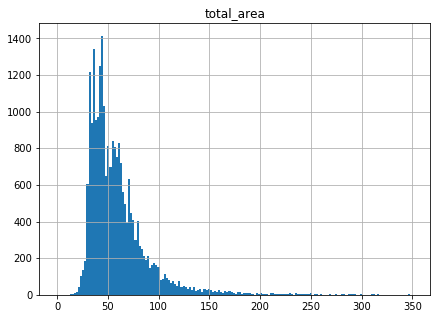

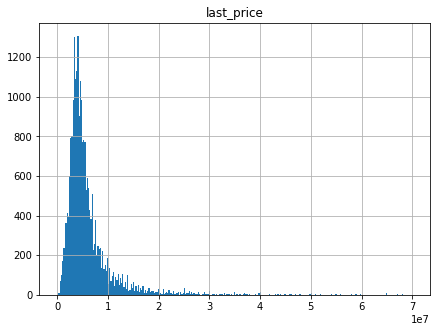

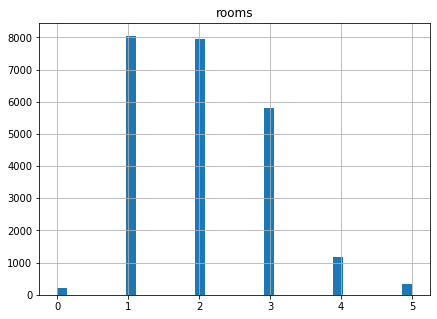

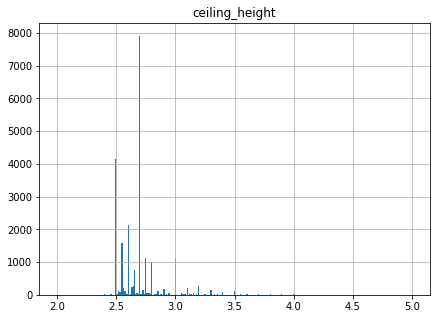

In [5]:
def hist_columns(data, column, x1, x2, f1, f2):
    h = data[column].hist(bins = 'auto', range = (x1, x2), figsize = (f1, f2))
    h.set_title(column)
    return plt.show()

hist_columns(data, 'total_area', 0, 350, 7, 5)
hist_columns(data, 'last_price', 12000, 70000000, 7, 5)
hist_columns(data, 'rooms', 0, 5, 7, 5)
hist_columns(data, 'ceiling_height', 2, 5, 7, 5)

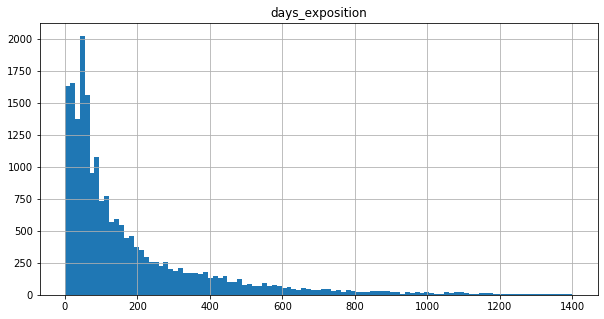

Медианное значение: 95.0 дней
Среднее значение: 180.88863436982163 дней


In [6]:
# ИЗУЧИМ ВРЕМЯ ПРОДАЖИ КВАРТИРЫ

hist_columns(data, 'days_exposition', 0, 1400, 10, 5)

print('Медианное значение:', data['days_exposition'].median(), 'дней')
print('Среднее значение:', data['days_exposition'].mean(),'дней')

Продажа недвижимости по времени доходит до 4.5 лет - аномальное значение, как и супер быстрые продажи в течение пары дней.  Хотя в жизни такое встречается, к примеру: собственник завысил стоимость и не хочет двигаться по цене, или обратная ситуация с занижением цены ниже среднерыночной. \
Однако для нашего исследования будем считать такие значения - выбросами, и ограничим время продажи. \
Q1-1.5IQR < NORM < Q3+1.5IQR

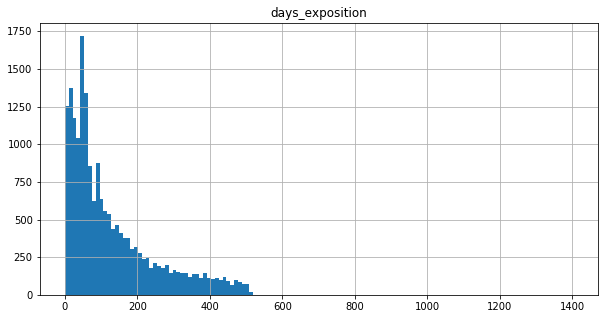

In [7]:
# УБЕРЕМ ВЫБИВАЮЩИЕСЯ ЗНАЧЕНИЯ

levaia_granitca = 45 - 1.5*(232 - 45)
pravaia_granitca = 232 + 1.5 * (232 - 45)

#Напишем функцию, выводящую датасэт с очищенными данными от выбросов в определенном столбце
def vibroci_granici(data, column, bins, x1, x2, f1, f2):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    lg = q1 - 1.5*(q3-q1)#левая граница
    pg = q3 + 1.5*(q3-q1)#правая граница
#     data_norm = data.query('@lg < @column < @pg & ~(@column == "Nan")')
    data_norm = data.loc[(data[column] >= lg) & 
                         (data[column] <= pg)]
    
    a = hist_columns(data_norm, column, x1, x2, f1, f2) #вставил написанную функцию 
    return a

vibroci_granici(data, 'days_exposition',  300, 0, 1400, 10, 5)

# hist_columns(data, column, x1, x2, f1, f2)

# data_norm = data.query('@levaia_granitca < days_exposition < @pravaia_granitca')
# hist_columns(data_norm, 'days_exposition', 300, 0, 1400, 10, 5)

Границы отложены. Продажа в один день не является выбросом, а вот все, что свыше "pravaia_granitca" = 512 дней - мы засчитываем, как выбивающиеся значения. 

Квартиры охотно продаются в течение первых полутора месяцев, можем видеть два пика: 1ый - в пределах одной недели, 2ой - от 30 до 40 дней.
Далее видна тенденция уменьшения числа квартир по длительности продажи, но опять же в конце 3его месяца появляется пик.\
Таким собственникам необходимо задуматься о ценовом предложении.

Далее изучим, какие факторы больше всего влияют на стоимость квартиры
- площадь
- число комнат 
- удаленность от центра
- этажность
- дата размещения

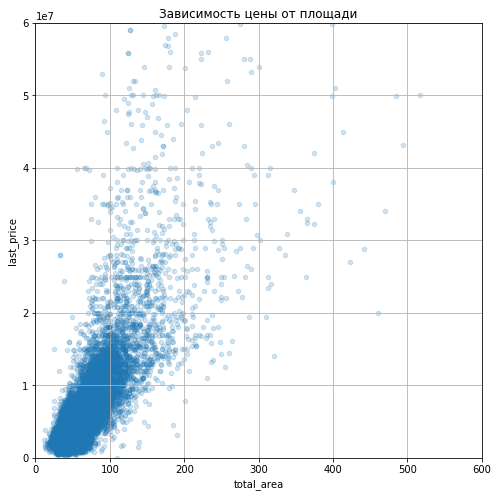

In [8]:
# ПЛОЩАДЬ
data.plot(title = 'Зависимость цены от площади', kind='scatter', x = 'total_area', y = 'last_price', style = 'o', 
          grid = True, alpha = 0.2, figsize = (8,8), xlim = (0,600), ylim = (0, 60000000))

От роста квадратуры растет цена квартиры, но есть и другие выбивающиеся значения (когда площадь одна, а цена существенно разнится). В таком случае можно предположить, что тут играет значение третий фактор, к примеру - отдаленность от центра.

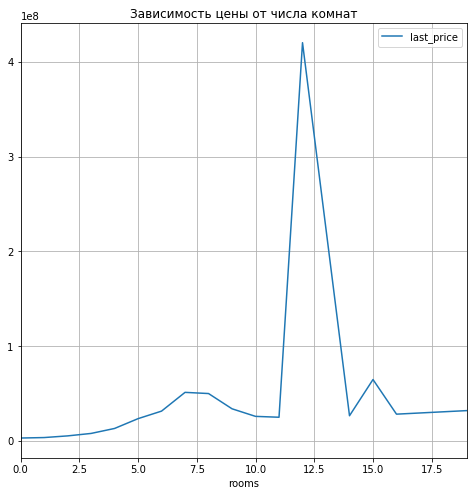

In [9]:
# Напишем функцию, визуализирующую сводные таблицы
def parametr(data, index, values, title, f1, f2):
    return data.pivot_table(index = index, values = values).plot(title = title, grid = True, figsize = (f1,f2))

# ЧИСЛО КОМНАТ 
parametr(data, 'rooms', 'last_price', 'Зависимость цены от числа комнат', 8,8)

Наблюдается тенденция роста цены от количества комнат, однако начиная с 7ми-8ми комнатной квартиры, рост цены останавливается и падает. Не считая запредельного выброса на 12-ти комнатной квартире. Не будем про него забывать, если далее придется находить зависимость от количества комнат.

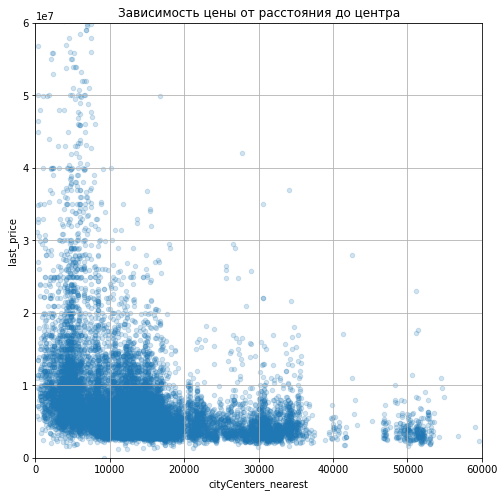

In [10]:
# УДАЛЕННОСТЬ ОТ ЦЕНТРА
data.plot(title = 'Зависимость цены от расстояния до центра', kind='scatter', x = 'cityCenters_nearest', y = 'last_price', style = 'o', 
          grid = True, alpha = 0.2, figsize = (8,8), xlim = (0,60000), ylim = (0, 60000000))

Сформулируем вывод так: чем дальше от центра, тем меньше цена. За редкостью встречаются дорогие объекты, но они однозначно дешевле дорогих центральных. 

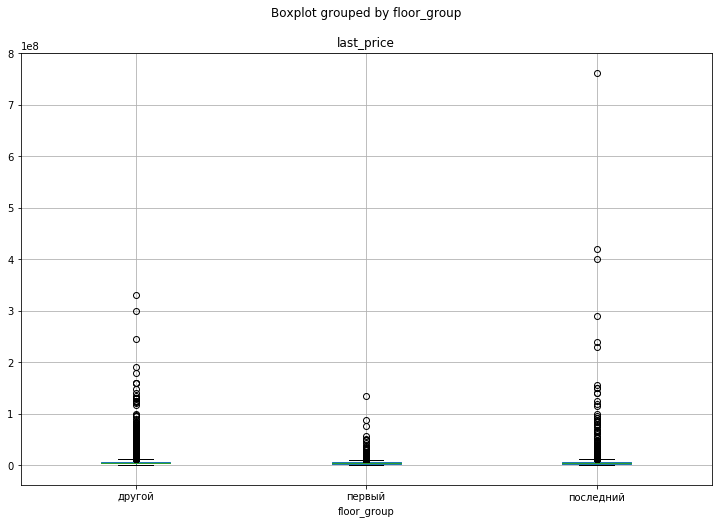

In [11]:
# ЭТАЖНОСТЬ
data.boxplot('last_price', by = 'floor_group', figsize = (12,8))

Первый этаж самый дешевый, однако встречаются случаи, когда ему по ценовому фактору может составить конкуренцию и последний (например, 9ти этажный дом без лифта).\
Чаще, более дорогие этажи - не первый и не последний, вполне возможно, что это обусловлено экологичностью ("еврейские" этажи - с 3го по 8ой).\
На последнем этаже цены разняться, как в пользу вышенаписанного примера (без лифта), так и в пользу дорогих пентхаусов (однако это лишь почти единичные случаи).

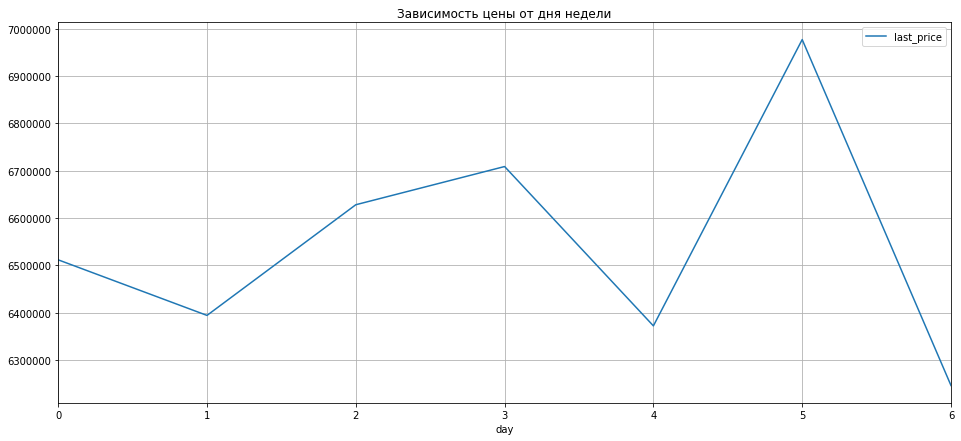

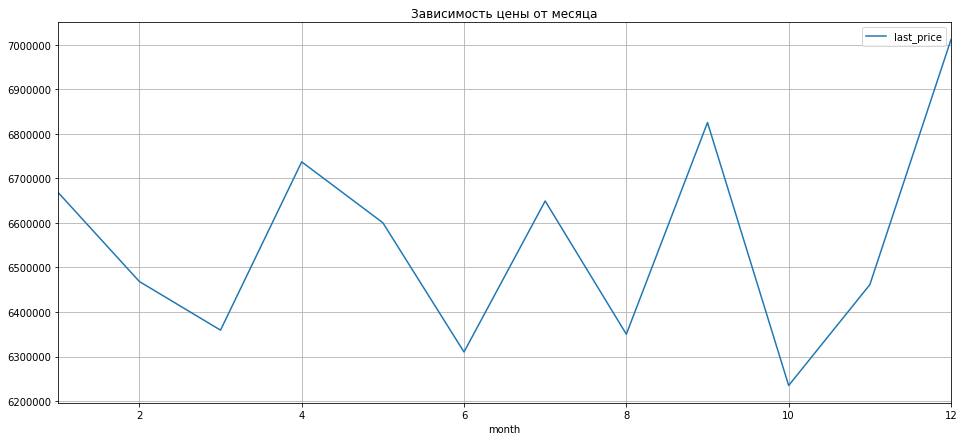

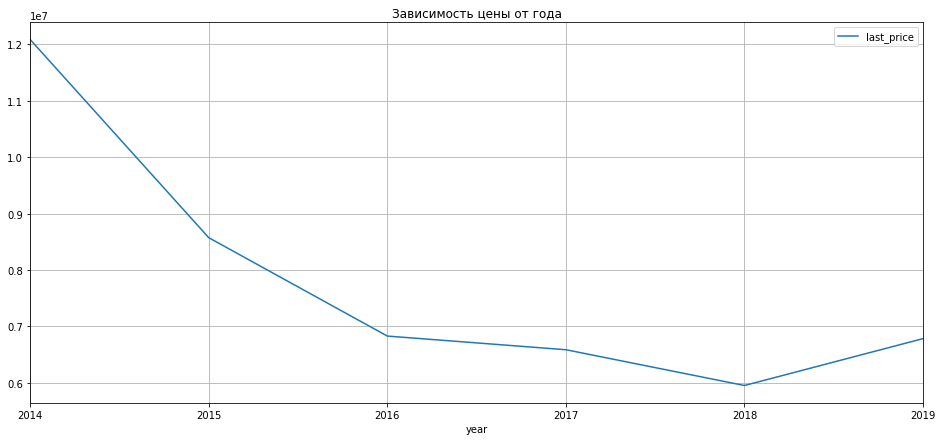

In [12]:
# ДАТА РАЗМЕЩЕНИЯ
# День недели
parametr(data, 'day', 'last_price', 'Зависимость цены от дня недели', 16,7)

# Месяц
parametr(data, 'month', 'last_price', 'Зависимость цены от месяца', 16,7)

# Год
parametr(data, 'year', 'last_price', 'Зависимость цены от года', 16,7)

В четверг и субботу совершались самые дорогие сделки. Но все же, судить по дню недели не совсем корректно, как и по месяцам (однако тут можно заметить, что наступление "Нового года" все-таки подбивает цены вверх).\
В зависимости от года продажи объектов анализ проводить куда разумнее, ведь тут прослеживается явная тенденция падения цен вплоть до 2018 года, после которого она меняется (повлияла ли на это экономическая ситуация в стране?).

Теперь выберем 10 населенных пунктов и посчитаем среднюю цену квадратного метра.

In [13]:
ten_locality_name = data['locality_name'].value_counts().head(10)
df = data.query('locality_name in @ten_locality_name.index')
df1 = df.groupby('locality_name')['price_per_meter'].mean()
df1.sort_values(ascending = False)

locality_name
Санкт-Петербург      114821.869765
Пушкин               103125.819291
деревня Кудрово       92473.547576
посёлок Парголово     90175.913458
посёлок Мурино        85752.189195
посёлок Шушары        78677.364217
Колпино               75424.579098
Гатчина               68746.146763
Всеволожск            68654.473986
Выборг                58141.909153
Name: price_per_meter, dtype: float64

Санкт-Петербург - административный центр Северо-Западного федерального округа и Ленинградской области, отсюда и высокие цены.
В то время, как Выборг можно считать самым дешевым городом среди этой десятки по стоимости жилья.

Выясним, какая область входит в центр Санкт-Петербурга. Для этого узнаем цену для каждого километра (переведем cityCenters_nearest в км и округлим)

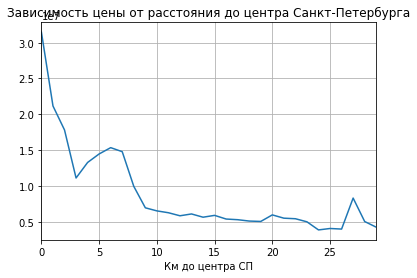

In [14]:
data['Км до центра СП'] = (data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'] / 1000).round()
data.groupby('Км до центра СП')['last_price'].mean().plot(title = 'Зависимость цены от расстояния до центра Санкт-Петербурга', grid = True)


График сильно меняет наклонность после 8 км. Соответственно, можно обозначить центром города - все, что лежит в пределах 8 км.

Выделим сегмент квартир в центре и проанализируем эту территорию, изучив следующие параметры: площадь, цена, число комнат, высота потолков.

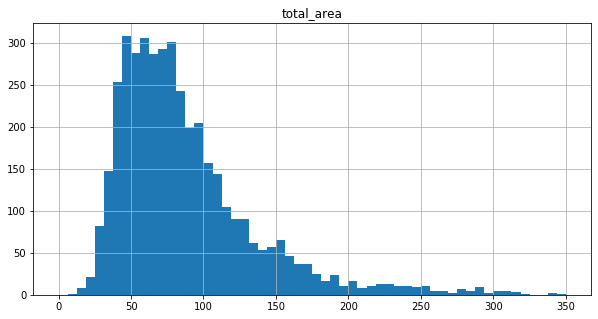

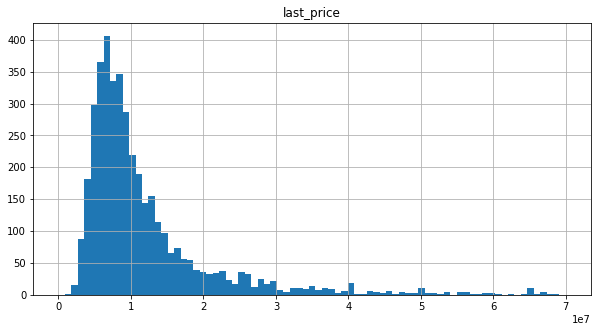

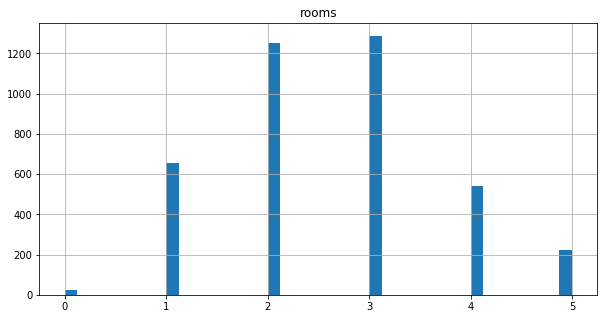

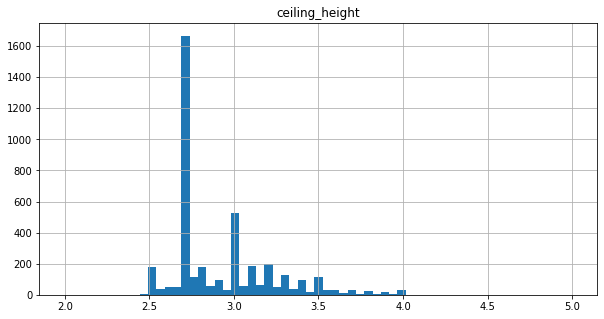

In [15]:
data_SPB_center = data[data['Км до центра СП'] <= 8]

hist_columns(data_SPB_center, 'total_area', 0, 350, 10, 5)
hist_columns(data_SPB_center, 'last_price', 12000, 70000000, 10, 5)
hist_columns(data_SPB_center, 'rooms', 0, 5, 10, 5)
hist_columns(data_SPB_center, 'ceiling_height', 2, 5, 10, 5)

- Большая часть площадей тут занимает диапазон 50-100м2, в то время, как наиболее часто встречаемая площадь вне центра ~до50м2. Также можем наблюдать квартиры с гигантскими площадями до 350м2.
- Средний или медианный ценник за квартиру в центре на порядок выше + встречаются особо дорогие варианты.
- С количеством комнат ситуация меняется. Центр обогащен объектами в основном от 3ех комнат в квартире, т.е. 4ех и даже 5ти комнатных площадей достаток, чего не скажешь об окраинах. Дома, построенные задого до современности, реставрируются, но вот планировка не меняется.
- Превалирующее значение высоты потолков в центре города 2.65м, как и на окраинах, но вот потолков выше этого порога, гораздо больше нежели "на переферии" города.

Теперь проверим, как изменились параметры: количество комнат, этаж, удаленность от центра, дата размещения - для центра города.

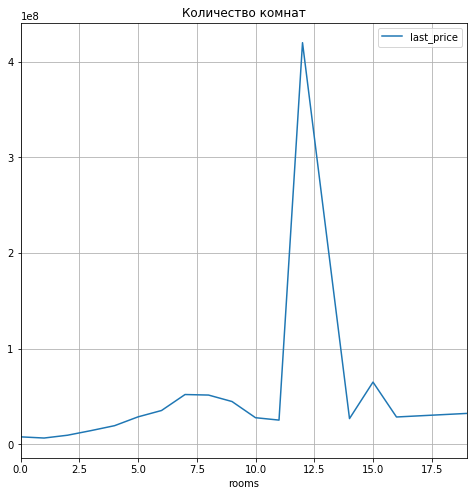

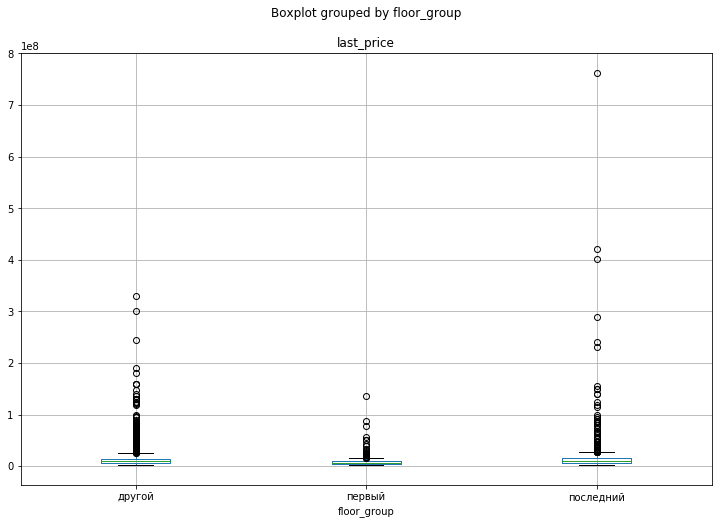

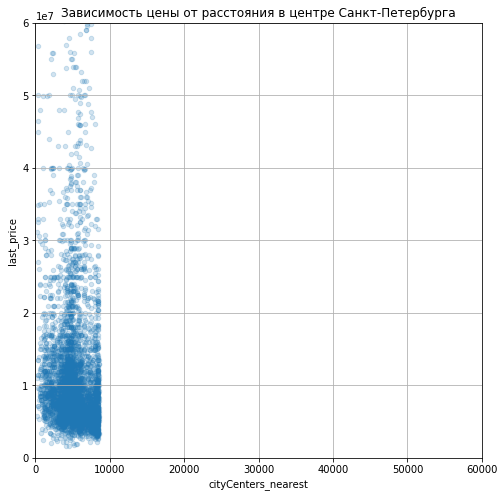

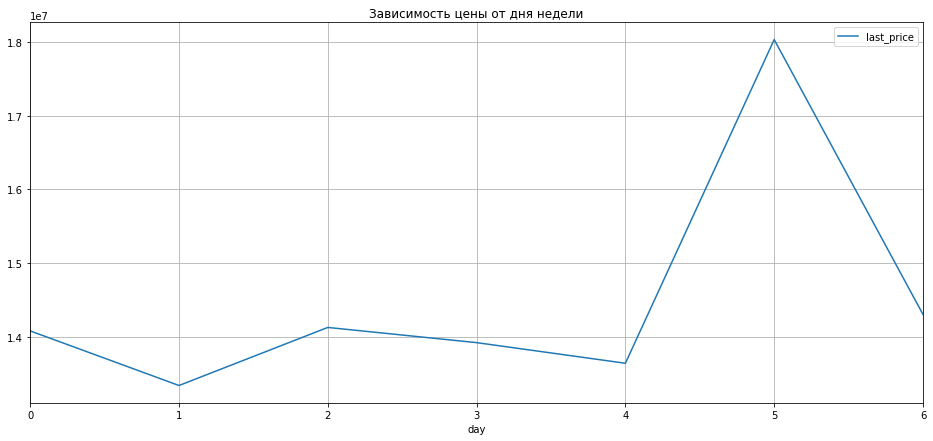

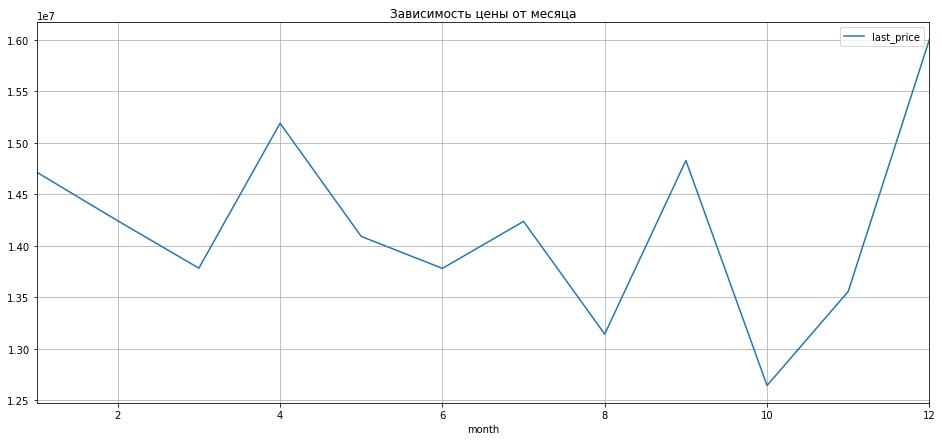

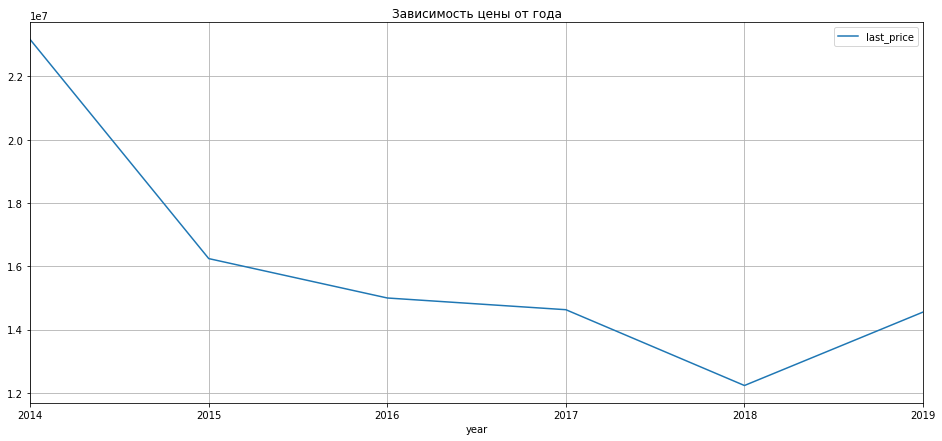

In [16]:
#КОЛИЧЕСТВО КОМНАТ
parametr(data_SPB_center, 'rooms', 'last_price', 'Количество комнат', 8,8)

#ЭТАЖ
data_SPB_center.boxplot('last_price', by = 'floor_group', figsize = (12,8))

#УДАЛЛЕННОСТЬ ОТ ЦЕНТРА
data_SPB_center.plot(title = 'Зависимость цены от расстояния в центре Санкт-Петербурга', kind='scatter', x = 'cityCenters_nearest', y = 'last_price', style = 'o', 
          grid = True, alpha = 0.2, figsize = (8,8), xlim = (0,60000), ylim = (0, 60000000))

#ДАТА РАЗМЕЩЕНИЯ
#День
parametr(data_SPB_center, 'day', 'last_price', 'Зависимость цены от дня недели', 16,7)
# Месяц
parametr(data_SPB_center,'month', 'last_price', 'Зависимость цены от месяца', 16,7)
# Год
parametr(data_SPB_center, 'year', 'last_price', 'Зависимость цены от года', 16,7)

Количество комнат: как показал анализ, 4-5комнатных квартир в центре гораздо больше.

Цены за любой этаж выше рыночной. Иногда этот параметр превосходит в разы.

Цена квартир массово находится в дипазоне 5млн-20млн рублей. Есть случаи, доходящие в стоимости до 60 млн.

Как и для общего анализа, в центре нет серьезной зависимости цены от дня недели, в то время, как по месяцам - май значительно бьет по цене, а пиковый - предыдущий месяц-апрель (помним, что для всех других районов - наступление нового года предвещает самые высокие цены). По годам видна просадка, как и прежде. С начала 2014 резкое падение, потом стагнация, и не существенный рост к концу 2019. 

<a id='e'></a>

### Шаг 5. Общий вывод

Как итоговые параметры для определения рыночной стоимости объекта следует включить:
- отдаленность от центра. Выше представлен аргумент в пользу этого параметра. Стоимость недвижимости в центре существенно выше стоимости квартир в других районах.
- число комнат. Чем больше комнат, тем дороже объект. И не важно, речь идет про центр города или окраины.
- площадь. Отдельный фактор. Разбив все продажи по населенным пунктам, видим большую разницу по среней цене за квадратный метр. Поэтому можем делать вывод, что бОльшая площадь влечет за собой бОльшую цену. А вот насколько бОльшую зависит от населенного пункта.
- этаж. Стоимость 1го этажа везде ниже, относительно верхних этажей. А все что выше, стОит примерно в одном диапазоне (за исключением, предположительно, пентхаусов в новостройках)
- дата продажи. Как мы уже поняли, различие в днях недели несущественный фактор, чего нельзя сказать про год или месяц. Если судить по годовому параметру, можем наблюдать монотонную стагнацию (за исключением последнего 2019 года, тут цена начала расти). А вот с месячным параметром ситуацию немного другая: в центре Санкт-Петербурга пик цен приходится на апрель-месяц, возможно ввиду большого спроса и малого предложения, в то время, как за другими районами повышение цен наблюдается в предновогоднем месяце - декабре. За центром кстати, это повышение тоже числиться, но не существеннее апреля.